# Setup

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt
from simple_segment import segment, fit

# Neelesh's Data
### Overview of Data

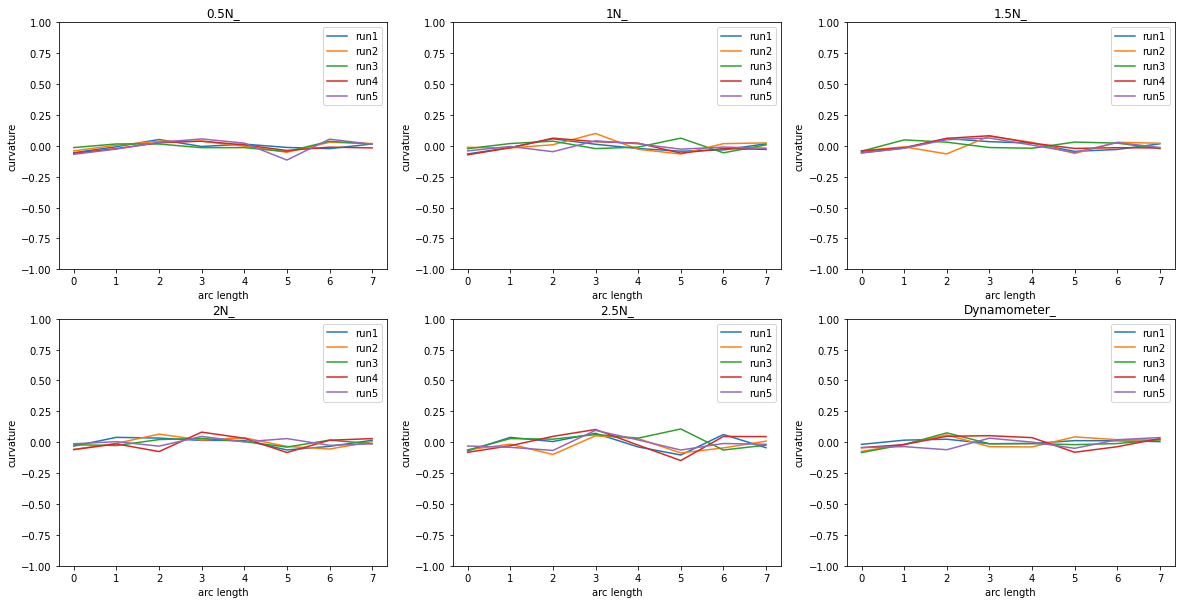

In [16]:
folder = "Neelesh_Data/"
force_string = ["0.5N_","1N_","1.5N_","2N_","2.5N_","Dynamometer_"]
run_string = ["run1","run2","run3","run4","run5"]

plt.figure(figsize=(20,10))

for force_ind in range(len(force_string)):
    plt.subplot(2,3,force_ind+1)
    plt.title(force_string[force_ind])
    for run in run_string:

        file = folder + force_string[force_ind] + run + ".json"

        with open(file,"r") as json_file:
            data = json.load(json_file)

        exp_params = data["experiment_parameters"]
        data = data["data"]

        curvatures = data[0]['curvatures']

        plt.plot(curvatures[10:18])
        plt.xlabel('arc length')
        plt.ylabel('curvature')
        plt.legend(run_string)
        plt.ylim((-1,1));

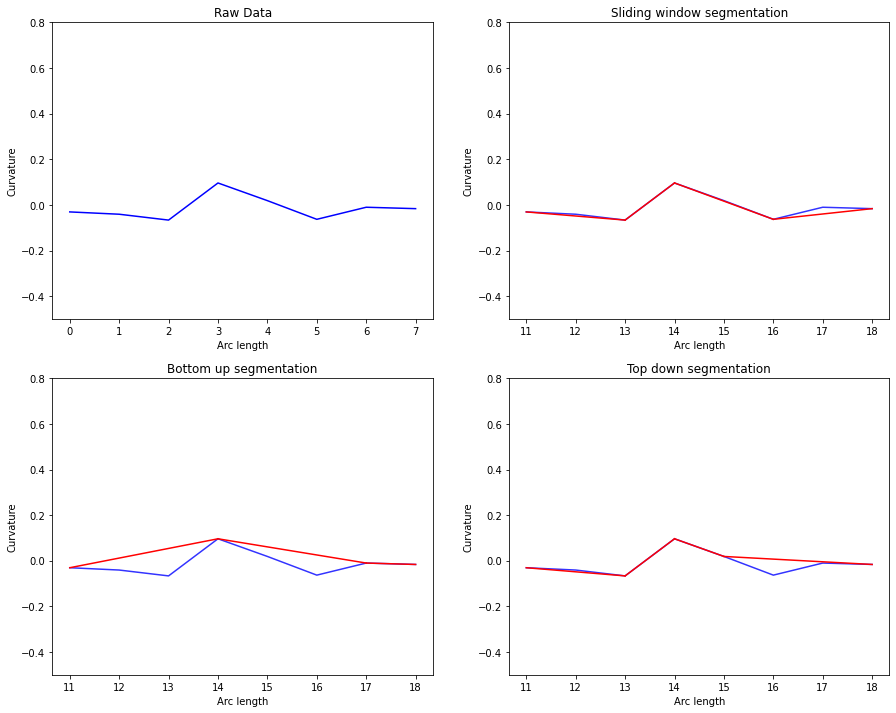

In [17]:
with open("Neelesh_Data/2.5N_run5.json") as json_file:
    data = json.load(json_file)

data = data["data"]

curvatures = data[0]['curvatures'][10:18]

max_error = 0.005

fig=plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(curvatures,'b')
plt.xlabel('Arc length')
plt.ylabel('Curvature')
plt.title('Raw Data')
plt.ylim((-0.5,0.8));

plt.subplot(2,2,2)
segments = segment.slidingwindowsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Sliding window segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(2,2,3)
segments = segment.bottomupsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Bottom up segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(2,2,4)
segments = segment.topdownsegment(curvatures, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(curvatures,"Top down segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

# # Plotting 2d positions
# positions = data[0]["positions_2d"]
# x = []
# y = []
# for point in positions:
#     x.append(point[0])
#     y.append(point[1])
# plt.figure()
# plt.plot(x,y)
# plt.title("2d positions")
# plt.xlabel("x")
# plt.ylabel("y");

Based on the plots, bottom up segmentation seems to perform the worst out of the 3. Between sliding window and top down segmentation, it might be worthwhile to improve its accuracy by implementing a thresholding algorithm to reduce the segmentations overfiited to noise in the data (Sections 3.2.1 - 3.2.3).

### Point Force Estimation

The paper now says to use the curvature segments to calculate internal moments $m$. Then use a constraint-based approach (BVP or IVP) to solve the equilibrium and constitutive equations (Section 2.2).